In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

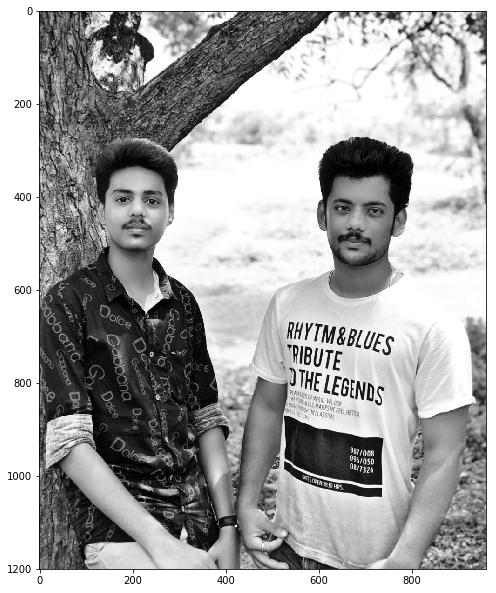

In [2]:
test_image = cv2.imread('data/frnds.jpeg')

# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.figure(figsize=(8,12))
plt.imshow(test_image_gray, cmap='gray')

# Haar cascade files

OpenCV comes with a lot of pre-trained classsifiers. For instance there are classifiers for smile, eyes,face etc. These come in the form of xml files.

In [3]:
haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_alt2.xml')

# Face detection

In [4]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5)
print('Faces found: ', len(faces_rects))

Faces found:  2


In [5]:
# loop over all the co-ordinates it returned and draw rectangles around them using Open CV
# we will be drawing a green rectangle with thicknessof 2
for (x,y,w,h) in faces_rects:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [6]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

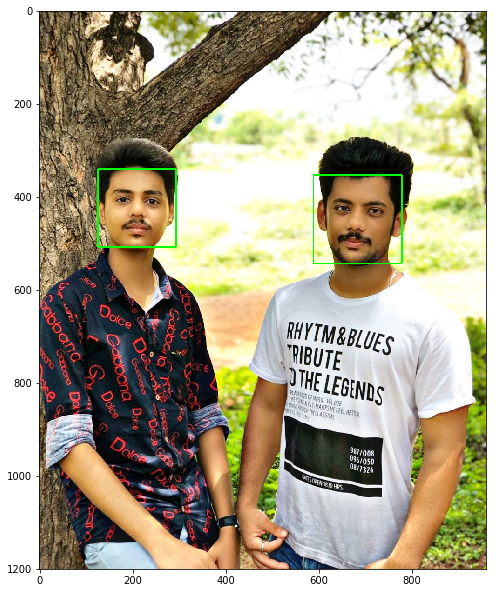

In [7]:
#convert image to RGB and show image
plt.figure(figsize=(8,12))
plt.imshow(convertToRGB(test_image))

### Generalized function for the entire face detection process.

In [8]:
def detect_faces(cascade, test_image, border):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), border)
        
    return image_copy

### Testing the function on new image




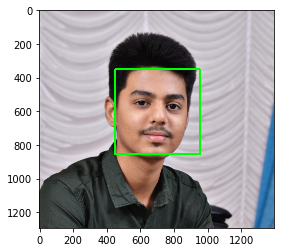

In [9]:
test_image2 = cv2.imread('data/kishan.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2, 8)

plt.imshow(convertToRGB(faces))

### Testing the function on a group photograph

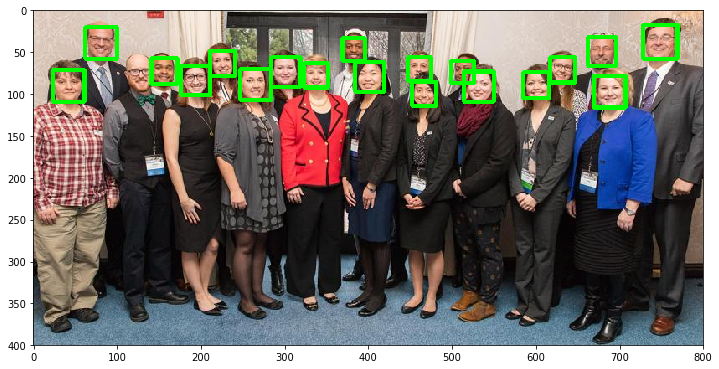

In [10]:
test_image2 = cv2.imread('data/grp.jpg')

faces = detect_faces(haar_cascade_face, test_image2, 3)

plt.figure(figsize=(12,9))
plt.imshow(convertToRGB(faces))

## Face and Eye detection

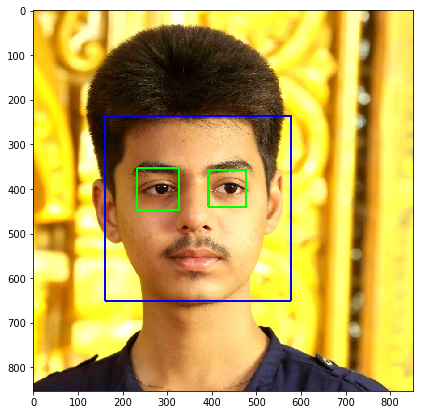

In [11]:
face_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_eye.xml')

img = cv2.imread('data/kishan1.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)

plt.figure(figsize=(7,7))
plt.imshow(convertToRGB(img))

## Smile detection

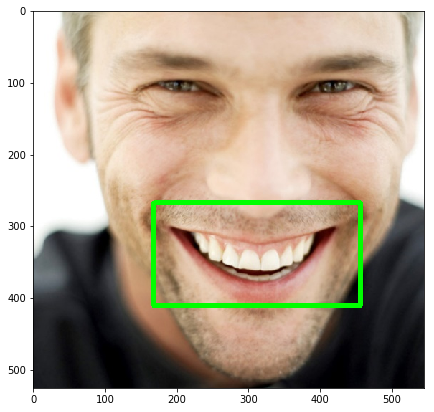

In [12]:
smile_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_smile.xml')

img = cv2.imread('data/happy2.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces_rect = smile_face.detectMultiScale(gray, 2, 20)
    
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
    
plt.figure(figsize=(7,7))
plt.imshow(convertToRGB(img))

## Full body detection

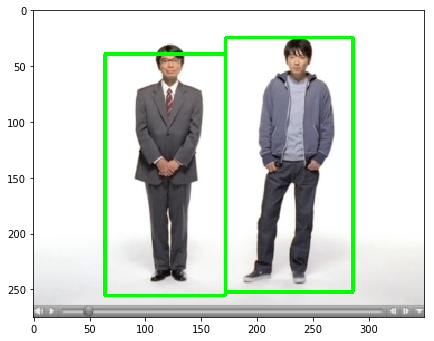

In [13]:
body_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_fullbody.xml')

img = cv2.imread('data/body2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces_rect = body_cascade.detectMultiScale(gray, 1.05, 2)
    
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
plt.figure(figsize=(7,7))
plt.imshow(convertToRGB(img))

## Cat face detection

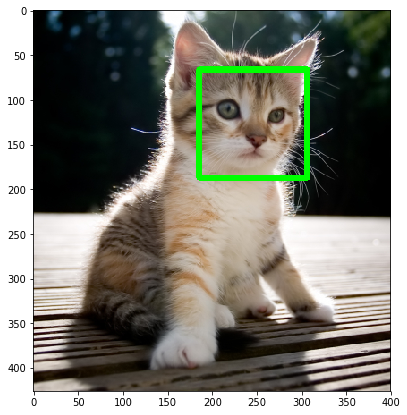

In [14]:
cat_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalcatface.xml')

img = cv2.imread('data/cat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces_rect = cat_face.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
    
plt.figure(figsize=(7,7))
plt.imshow(convertToRGB(img))

## Licence Plate detection

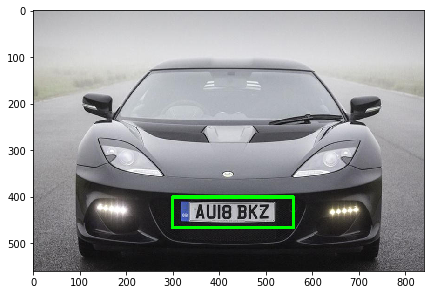

In [15]:
license_plate = cv2.CascadeClassifier('data/haarcascades/haarcascade_licence.xml')

img = cv2.imread('data/license.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces_rect = license_plate.detectMultiScale(gray, 5, 20)
    
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
    
plt.figure(figsize=(7,7))
plt.imshow(convertToRGB(img))

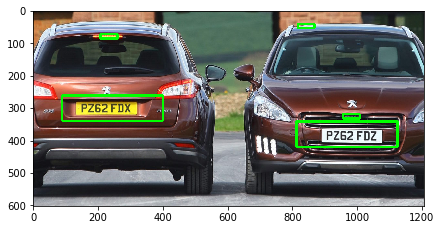

In [16]:
img = cv2.imread('data/license2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces_rect = license_plate.detectMultiScale(gray, 6, 20)
    
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
    
plt.figure(figsize=(7,7))
plt.imshow(convertToRGB(img))